In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (1).xlsx


In [142]:
# 데이터 읽기
df = pd.read_excel('202501.xlsx')

In [143]:
# 금속 컬럼 추출
metal_columns = [col for col in df.columns if '(ng/m3)' in col]
print("금속 컬럼 개수:", len(metal_columns))
print(metal_columns[:10])

금속 컬럼 개수: 35
['Al(ng/m3)', 'Si(ng/m3)', 'S(ng/m3)', 'K(ng/m3)', 'Ca(ng/m3)', 'Ti(ng/m3)', 'V(ng/m3)', 'Cr(ng/m3)', 'Mn(ng/m3)', 'Fe(ng/m3)']


In [144]:
# 음수 값 Nan 처리
df[metal_columns] = df[metal_columns].applymap(lambda x: np.nan if x < 0 else x)
df['Conc(ug/m3)'] = df['Conc(ug/m3)'].apply(lambda x: np.nan if x < 0 else x)

/tmp/ipython-input-4217171700.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: np.nan if x < 0 else x)


In [145]:
# 금속 총합 계산
df['Total_Metals'] = df[metal_columns].sum(axis=1)

In [146]:
# 전처리 및 금속 총합 계산 결과 확인
df[['Conc(ug/m3)', 'Total_Metals'] + metal_columns[:6]].head(6)

,Conc(ug/m3),Total_Metals,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Ti(ng/m3)
0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5694.55,793.97,834.70,2338.79,358.10,155.00,0.75
2,10.20,4748.94,1004.34,727.61,1361.91,281.32,124.75,0.59
3,6.90,4073.69,477.28,687.55,1387.49,267.52,128.43,NaN
4,6.26,4270.40,465.45,717.28,1441.36,266.17,138.57,0.28
5,8.44,4710.84,429.06,705.10,1999.81,238.93,134.96,0.58


In [147]:
# Pearson 상관관계 분석
pearson_corr = df[analysis_columns].corr(method='pearson')

In [148]:
# Pearson 상관관계 표 생성 (PM2.5 기준 내림차순 정렬)
pearson_pm25 = pd.DataFrame({
    'Metal': metal_columns,
    'Pearson_PM25': pearson_corr.loc[metal_columns, 'Conc(ug/m3)']
}).sort_values(by='Pearson_PM25', ascending=False).reset_index(drop=True)

# 결과 확인
pearson_pm25

,Metal,Pearson_PM25
0,S(ng/m3),0.830394
1,Br(ng/m3),0.751931
2,Fe(ng/m3),0.633593
3,Co(ng/m3),0.619837
4,Pb(ng/m3),0.561423
5,K(ng/m3),0.545956
6,Al(ng/m3),0.513880
7,Mn(ng/m3),0.491092
8,Zn(ng/m3),0.488633
9,Ca(ng/m3),0.357588


In [149]:
# Pearson 상관관계 표 생성 (Total_Metals 기준 내림차순 정렬)
pearson_total = pd.DataFrame({
    'Metal': metal_columns,
    'Pearson_Total': pearson_corr.loc[metal_columns, 'Total_Metals']
}).sort_values(by='Pearson_Total', ascending=False).reset_index(drop=True)

# 결과 확인
pearson_total

,Metal,Pearson_Total
0,S(ng/m3),0.854136
1,Al(ng/m3),0.818150
2,Fe(ng/m3),0.813224
3,Co(ng/m3),0.807083
4,Ca(ng/m3),0.692985
5,Br(ng/m3),0.657492
6,Si(ng/m3),0.647448
7,K(ng/m3),0.570771
8,Mn(ng/m3),0.539459
9,Ti(ng/m3),0.493363


In [172]:
# 히트맵 컬럼 정렬 순서 설정
sorted_cols = ['Conc(ug/m3)', 'Total_Metals'] + sorted(metal_columns)

# 히트맵 컬럼 정렬 실행
sorted_corr_pearson = pearson_corr.loc[sorted_cols, sorted_cols]
sorted_corr_spearman = spearman_corr.loc[sorted_cols, sorted_cols]

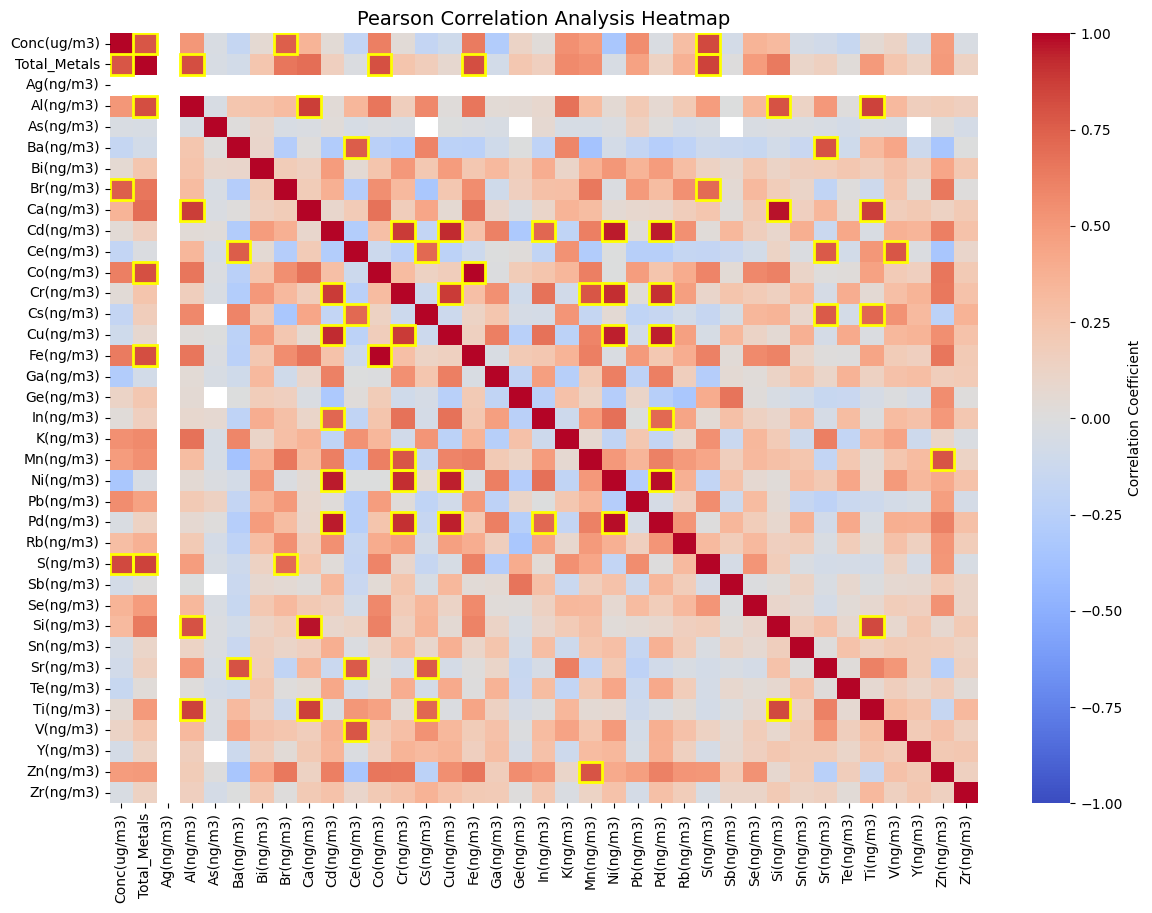

In [169]:
# Pearson 히트맵 생성
plt.figure(figsize=(14, 10))
ax = sns.heatmap(sorted_corr, cmap='coolwarm', annot=False, vmin=-1, vmax=1,
                 cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Pearson Correlation Analysis Heatmap", fontsize=14)

# 강한 상관 관계 강조 표시 (>= 0.7)
threshold = 0.7
for i in range(len(sorted_corr)):
    for j in range(len(sorted_corr)):
        if abs(sorted_corr.iloc[i, j]) >= threshold and i != j:
            rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
            ax.add_patch(rect)

plt.show()

In [173]:
# Spearman 상관관계 분석
spearman_corr = df[analysis_columns].corr(method='spearman')

In [106]:
# Spearman 상관관계 표 생성 (PM2.5 기준 내림차순 정렬)
spearman_pm25 = pd.DataFrame({
    'Metal': metal_columns,
    'Spearman_PM25': spearman_corr.loc[metal_columns, 'Conc(ug/m3)']
}).sort_values(by='Spearman_PM25', ascending=False).reset_index(drop=True)

# 결과 확인
spearman_pm25

,Metal,Spearman_PM25
0,Si(ng/m3),0.816186
1,S(ng/m3),0.814803
2,Br(ng/m3),0.795097
3,Fe(ng/m3),0.773501
4,Co(ng/m3),0.757615
5,Ca(ng/m3),0.718278
6,Pb(ng/m3),0.682362
7,Al(ng/m3),0.671010
8,K(ng/m3),0.659878
9,Zn(ng/m3),0.503389


In [107]:
# Spearman Total_Metals 상관관계 표 생성 (Total_Metals 기준 내림차순 정렬)
spearman_total = pd.DataFrame({
    'Metal': metal_columns,
    'Spearman_Total': spearman_corr.loc[metal_columns, 'Total_Metals']
}).sort_values(by='Spearman_Total', ascending=False).reset_index(drop=True)

# 결과 확인
spearman_total

,Metal,Spearman_Total
0,S(ng/m3),0.908564
1,Al(ng/m3),0.857598
2,Si(ng/m3),0.844935
3,Ca(ng/m3),0.830150
4,Fe(ng/m3),0.794901
5,Co(ng/m3),0.784578
6,K(ng/m3),0.733795
7,Br(ng/m3),0.687051
8,Mn(ng/m3),0.549154
9,Pb(ng/m3),0.518540


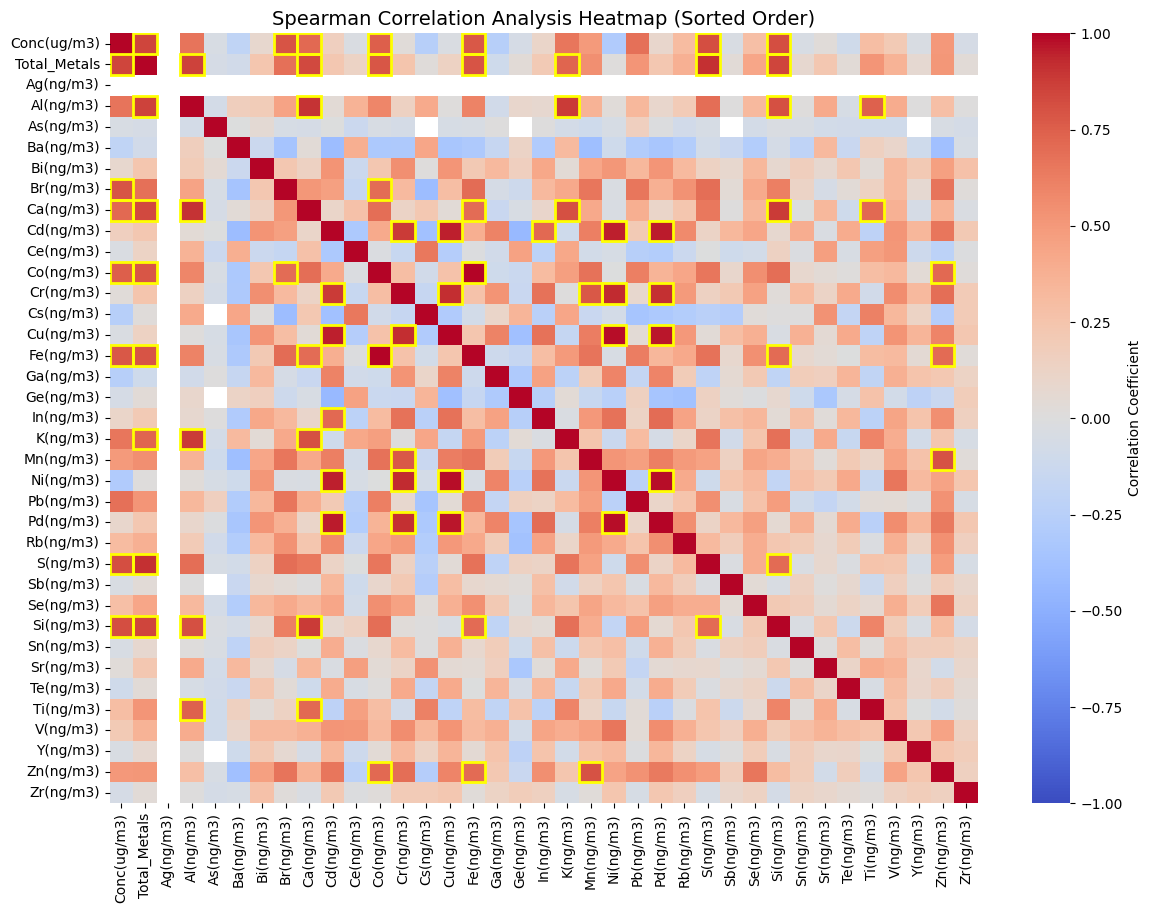

In [175]:
# Spearman 히트맵 생성
plt.figure(figsize=(14, 10))
ax = sns.heatmap(sorted_corr_spearman, cmap='coolwarm', annot=False, vmin=-1, vmax=1,
                 cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Spearman Correlation Analysis Heatmap (Sorted Order)", fontsize=14)

# 강한 상관 관계 강조 표시 (>= 0.7)
threshold = 0.7
for i in range(len(sorted_corr_spearman)):
    for j in range(len(sorted_corr_spearman)):
        if abs(sorted_corr_spearman.iloc[i, j]) >= threshold and i != j:
            rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
            ax.add_patch(rect)

plt.show()